# Calculate Detector Counts: NEI, High-frequency Nanoflares
Compute detector counts, including non-equilibrium ionization.

In [16]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import h5py
import astropy.units as u
import sunpy.map 
import distributed

import synthesizAR
from synthesizAR.instruments import InstrumentSDOAIA
from synthesizAR.atomic import EmissionModel

In [2]:
client = distributed.Client()
client

Client Scheduler: tcp://127.0.0.1:34848 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 64 Cores: 64 Memory: 270.38 GB


In [3]:
field = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/field_checkpoint/')

In [5]:
em_model = EmissionModel.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/nei/emission_model.json')

In [5]:
aia = InstrumentSDOAIA([0, 30000]*u.s,)
observer = synthesizAR.Observer(field, [aia], parallel=True)

In [6]:
observer.build_detector_files('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/nei/',
                              ds=0.5 * u.Mm)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [ ]:
futures = observer.flatten_detector_counts(emission_model=em_model)

Now, compute the maps

In [7]:
bin_futures = observer.bin_detector_counts('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/nei/',)

In [50]:
m = sunpy.map.Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/nei/SDO_AIA/193/map_t001500.fits')

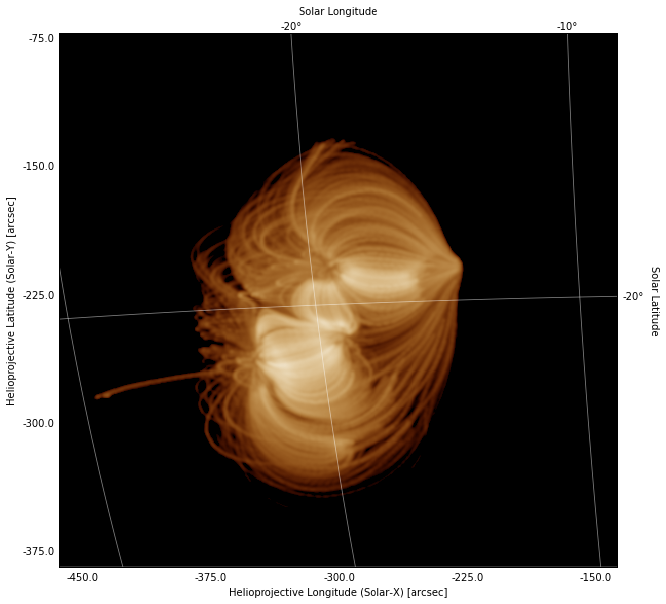

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection=m)
m.plot(axes=ax,
       norm=matplotlib.colors.SymLogNorm(1e-10,vmin=1,vmax=2e3),
       title=False)
ax.grid(alpha=0)
m.draw_grid(axes=ax,grid_spacing=10*u.deg,color='w')